In [2]:
import pandas as pd
import datetime as dt

In [3]:
df=pd.read_csv("./US_Accidents_June20.csv")
df.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [9]:
df.isnull().sum()

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitat

In [10]:
# DF for target 'Severity' and features 'Weather Condition'
df_new=pd.DataFrame(
    data=df,columns=['Severity','Weather_Condition'],index=df.index.copy())
df_new

,Severity,Weather_Condition
0,3,Light Rain
1,2,Light Rain
2,2,Overcast
3,3,Mostly Cloudy
4,2,Mostly Cloudy
...,...,...
3513612,2,Fair
3513613,2,Fair
3513614,2,Partly Cloudy
3513615,2,Fair


In [11]:
df_new.isnull().sum()

Severity                 0
Weather_Condition    76138
dtype: int64

In [12]:
df_new=df_new.dropna()


In [13]:
df_new.isnull().sum()

Severity             0
Weather_Condition    0
dtype: int64

In [14]:
df_new

,Severity,Weather_Condition
0,3,Light Rain
1,2,Light Rain
2,2,Overcast
3,3,Mostly Cloudy
4,2,Mostly Cloudy
...,...,...
3513612,2,Fair
3513613,2,Fair
3513614,2,Partly Cloudy
3513615,2,Fair


In [15]:
# Replacing Severity level 1 and 2 to 0
df_new=df_new.replace([1,2],0)

In [16]:
# Replacing Severity level 3 and 4 to 1
df_new=df_new.replace([3,4],1)

In [17]:
df_new

,Severity,Weather_Condition
0,1,Light Rain
1,0,Light Rain
2,0,Overcast
3,1,Mostly Cloudy
4,0,Mostly Cloudy
...,...,...
3513612,0,Fair
3513613,0,Fair
3513614,0,Partly Cloudy
3513615,0,Fair


In [43]:
# Target
y = df_new['Severity']
y

0          1
1          0
2          0
3          1
4          0
          ..
3513612    0
3513613    0
3513614    0
3513615    0
3513616    0
Name: Severity, Length: 3437479, dtype: int64

In [44]:
# Features
X = pd.get_dummies(df_new['Weather_Condition'])
X.head(100)

,Blowing Dust,Blowing Dust / Windy,Blowing Sand,Blowing Snow,Blowing Snow / Windy,Clear,Cloudy,Cloudy / Windy,Drifting Snow,Drizzle,...,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Thunderstorms and Snow,Tornado,Volcanic Ash,Widespread Dust,Widespread Dust / Windy,Wintry Mix,Wintry Mix / Windy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Dataframe for target 'Sunrise_Sunset' and feature 'Weather Condition'
df_time=pd.DataFrame(
    data=df,columns=['Sunrise_Sunset','Weather_Condition'],index=df.index.copy())
df_time

,Sunrise_Sunset,Weather_Condition
0,Night,Light Rain
1,Night,Light Rain
2,Night,Overcast
3,Night,Mostly Cloudy
4,Day,Mostly Cloudy
...,...,...
3513612,Day,Fair
3513613,Day,Fair
3513614,Day,Partly Cloudy
3513615,Day,Fair


In [46]:
df_time.isnull().sum()

Sunrise_Sunset         115
Weather_Condition    76138
dtype: int64

In [47]:
df_time=df_time.dropna()

In [48]:
df_time.isnull().sum()

Sunrise_Sunset       0
Weather_Condition    0
dtype: int64

In [49]:
# Target
A=df_time['Sunrise_Sunset']
A

0          Night
1          Night
2          Night
3          Night
4            Day
           ...  
3513612      Day
3513613      Day
3513614      Day
3513615      Day
3513616      Day
Name: Sunrise_Sunset, Length: 3437370, dtype: object

In [50]:
# Features
B=pd.get_dummies(df_time['Weather_Condition'])
B

,Blowing Dust,Blowing Dust / Windy,Blowing Sand,Blowing Snow,Blowing Snow / Windy,Clear,Cloudy,Cloudy / Windy,Drifting Snow,Drizzle,...,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Thunderstorms and Snow,Tornado,Volcanic Ash,Widespread Dust,Widespread Dust / Windy,Wintry Mix,Wintry Mix / Windy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3513613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3513614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3513615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

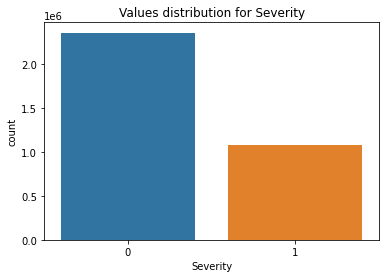

In [65]:
#Values distribution for Severity
sns.countplot(y)
plt.title('Values distribution for Severity')
plt.show()

In [66]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 2354303), (1, 2354303)]


In [67]:
#splitting the data into train and test dataset for applying machine learning model on it
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.3, random_state=42)

Logistic Regression for df_new (Severity)

In [72]:
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [73]:
classifier.fit(X_train, y_train)


LogisticRegression(random_state=1)

In [75]:
accuracy_score(y_test, predictions)

0.5407261312971565

In [74]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
92236,0,1
4207889,1,1
2857955,0,0
1395026,0,1
962984,0,1
...,...,...
2027558,1,1
341124,1,0
2552172,1,1
3182122,0,1


Decision Tree for Classification Model for df_new (Severity)

In [56]:
#Decision Tree Classifier model on training data and predictions
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [57]:
# Accuracy score 
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.5407445373082767

In [58]:
#Classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.56      0.37      0.44    705881
           1       0.53      0.72      0.61    706701

    accuracy                           0.54   1412582
   macro avg       0.55      0.54      0.53   1412582
weighted avg       0.55      0.54      0.53   1412582



**Prediction models for df_time (Sunrise/Sunset)**

In [59]:
#Balancing data for the df_time 
ros = RandomOverSampler(random_state=0)
B_resampled, A_resampled = ros.fit_resample(B, A)
from collections import Counter
print(sorted(Counter(A_resampled).items()))

[('Day', 2538566), ('Night', 2538566)]


In [60]:
#splitting the data into train and test dataset for df_time
B_train,B_test,A_train,A_test = train_test_split(B_resampled,A_resampled,test_size=0.3, random_state=42)

In [61]:
#Decision Tree Classifier model on training data and predictions for df_time
model = DecisionTreeClassifier()
model.fit(B_train,A_train)
A_pred = model.predict(B_test)

In [62]:
# Accuracy score
accuracy = accuracy_score(A_test,A_pred)
accuracy

0.5588265031448193

In [63]:
#Classification report
from sklearn.metrics import classification_report
report = classification_report(A_test,A_pred)
print(report)

              precision    recall  f1-score   support

         Day       0.56      0.52      0.54    761176
       Night       0.55      0.60      0.58    761964

    accuracy                           0.56   1523140
   macro avg       0.56      0.56      0.56   1523140
weighted avg       0.56      0.56      0.56   1523140

